In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 3: Load dataset
df = pd.read_csv('Indian_EV_Stations_Simplified.csv')

In [3]:
# Step 4: Clean/convert coordinates to numeric, handle missing values
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [4]:
# Remove rows where coordinates are missing
df = df.dropna(subset=['Latitude', 'Longitude'])

In [5]:

# Optionally clean other columns (strip whitespace, fix names)
df['City'] = df['City'].astype(str).str.strip()
df['State'] = df['State'].astype(str).str.strip()
df['Station Name'] = df['Station Name'].astype(str).str.strip()

In [6]:
# Step 5: Define your search location (change to any city you wish)
YOUR_LAT, YOUR_LON = 28.6139, 77.2090  # Example: Delhi center

# Step 6: Haversine distance function (vectorized)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1r, lon1r, lat2r, lon2r = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2r - lat1r, lon2r - lon1r
    a = np.sin(dlat/2)**2 + np.cos(lat1r) * np.cos(lat2r) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df['distance_km'] = haversine(YOUR_LAT, YOUR_LON, df['Latitude'], df['Longitude'])


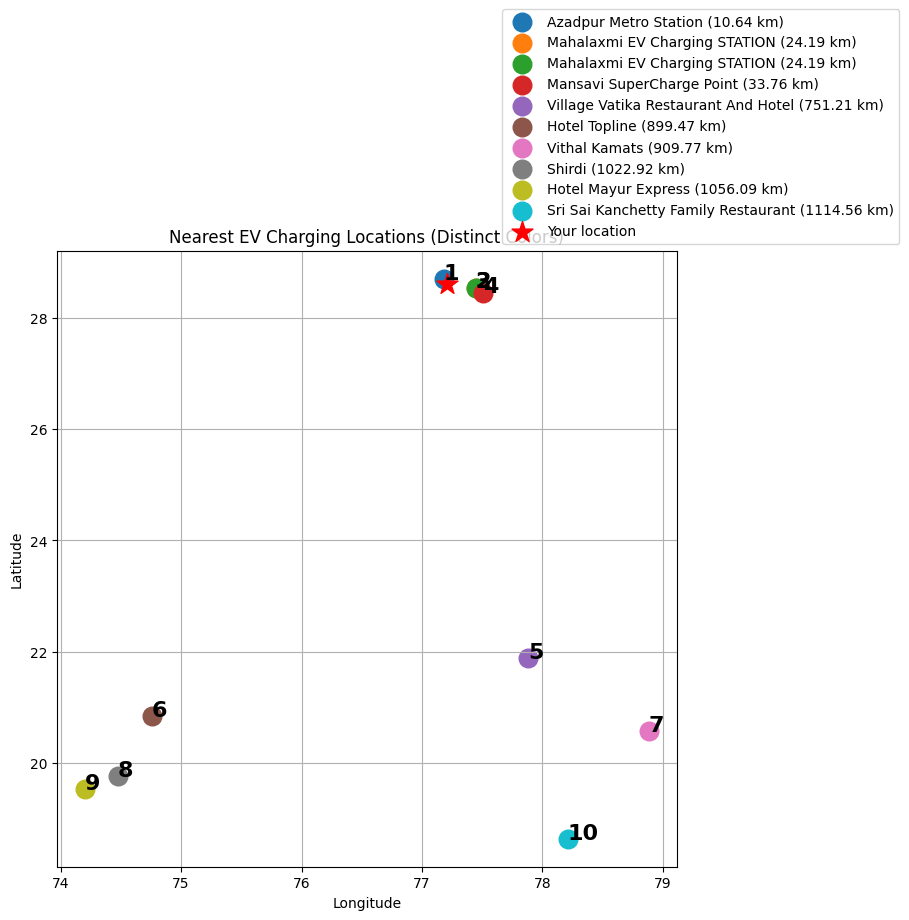

,Station Name,City,State,Latitude,Longitude,distance_km
798,Azadpur Metro Station,Delhi,Delhi,28.706612,77.182108,10.637765
806,Mahalaxmi EV Charging STATION,Gautaum Buddha Nagar,uttar pradesh,28.547530,77.444910,24.188781
807,Mahalaxmi EV Charging STATION,Gautaum Buddha Nagar,uttar pradesh,28.547530,77.444910,24.188781
789,Mansavi SuperCharge Point,G B Nagar,Uttar Pradesh,28.455186,77.503585,33.757916
799,Village Vatika Restaurant And Hotel,Danora,Madhya Pradesh,21.885671,77.883991,751.212599
791,Hotel Topline,Dhule,Maharashtra,20.836968,74.755610,899.470945
800,Vithal Kamats,Hinganghat,Maharashtra,20.574439,78.882304,909.773444
18,Shirdi,Shirdi,Maharashtra,19.757594,74.476347,1022.921172
792,Hotel Mayur Express,Sangamner,Maharashtra,19.520114,74.202737,1056.094014
790,Sri Sai Kanchetty Family Restaurant,Dichpally,Telangana,18.632171,78.208170,1114.557102


In [7]:
# Step 7: Get nearest stations and assign colors
nearest = df.nsmallest(10, 'distance_km').copy()
colors = plt.cm.tab10(np.linspace(0,1,len(nearest)))

plt.figure(figsize=(8,8))
for i, (_, row) in enumerate(nearest.iterrows()):
    plt.scatter(row['Longitude'], row['Latitude'],
                color=colors[i], s=180, label=f"{row['Station Name']} ({row['distance_km']:.2f} km)")
    plt.annotate(f"{i+1}", (row['Longitude'], row['Latitude']), color='black', fontsize=16, weight='bold')

plt.scatter(YOUR_LON, YOUR_LAT, color='red', s=250, marker='*', label='Your location')
plt.title("Nearest EV Charging Locations (Distinct Colors)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='lower right', bbox_to_anchor=(1.37, 1))
plt.grid(True)
plt.show()

# Step 8: Show info about nearest stations in a nice table
nearest[['Station Name','City','State','Latitude','Longitude','distance_km']]


In [8]:
# Step 8: Show info about nearest stations in a nice table
nearest[['Station Name','City','State','Latitude','Longitude','distance_km']]

,Station Name,City,State,Latitude,Longitude,distance_km
798,Azadpur Metro Station,Delhi,Delhi,28.706612,77.182108,10.637765
806,Mahalaxmi EV Charging STATION,Gautaum Buddha Nagar,uttar pradesh,28.547530,77.444910,24.188781
807,Mahalaxmi EV Charging STATION,Gautaum Buddha Nagar,uttar pradesh,28.547530,77.444910,24.188781
789,Mansavi SuperCharge Point,G B Nagar,Uttar Pradesh,28.455186,77.503585,33.757916
799,Village Vatika Restaurant And Hotel,Danora,Madhya Pradesh,21.885671,77.883991,751.212599
791,Hotel Topline,Dhule,Maharashtra,20.836968,74.755610,899.470945
800,Vithal Kamats,Hinganghat,Maharashtra,20.574439,78.882304,909.773444
18,Shirdi,Shirdi,Maharashtra,19.757594,74.476347,1022.921172
792,Hotel Mayur Express,Sangamner,Maharashtra,19.520114,74.202737,1056.094014
790,Sri Sai Kanchetty Family Restaurant,Dichpally,Telangana,18.632171,78.208170,1114.557102


In [9]:
# Load and clean the data
df = pd.read_csv('Indian_EV_Stations_Simplified.csv')
df['City'] = df['City'].astype(str).str.strip()

In [10]:
# Count stations per city (top 10)
city_counts = df['City'].value_counts().nlargest(10)

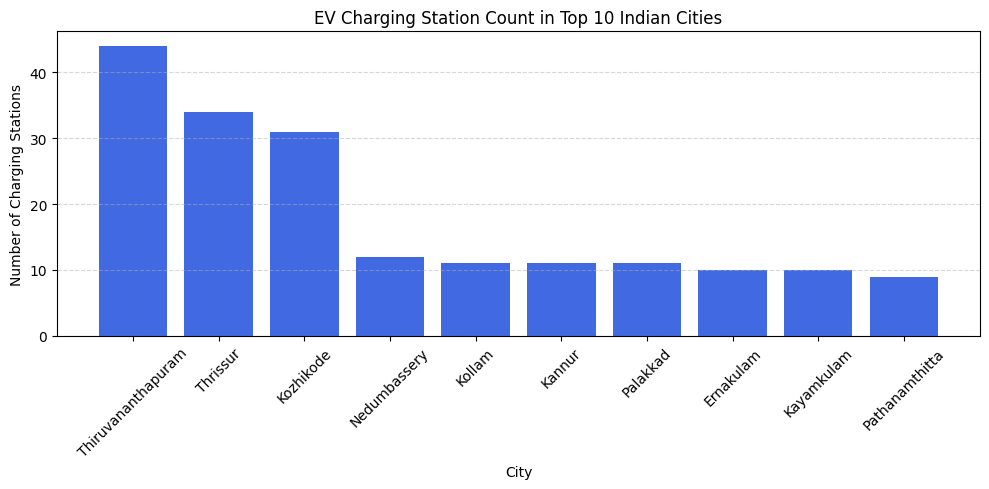

In [11]:
plt.figure(figsize=(10,5))
plt.bar(city_counts.index, city_counts.values, color='royalblue')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.title('EV Charging Station Count in Top 10 Indian Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()